<a href="https://colab.research.google.com/github/Miguel72-bit/CORTE2/blob/main/taller3IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


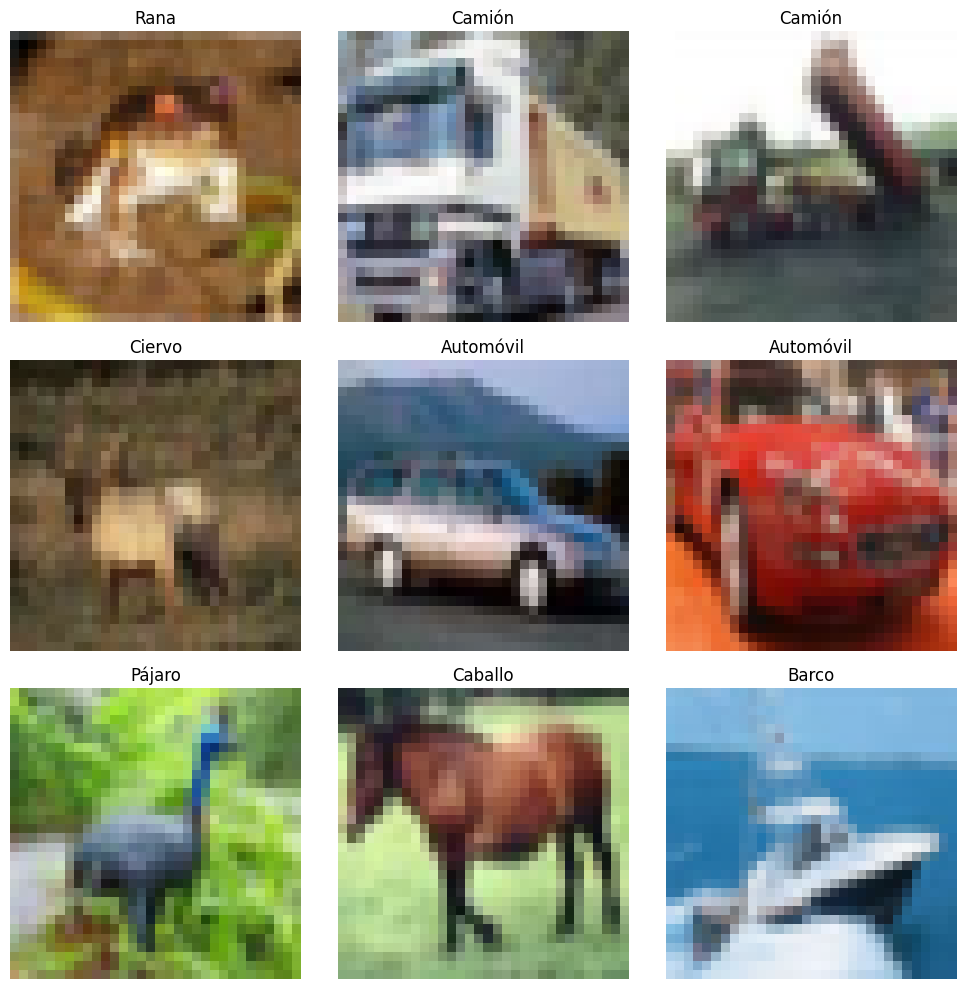

In [1]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

# Cargamos el conjunto de datos CIFAR-10
# Este dataset contiene 60,000 imágenes a color de 32x32 píxeles en 10 categorías
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizamos los valores de píxeles al rango [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convertimos las etiquetas a formato one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Definimos los nombres de las clases para su visualización
class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Ciervo',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

# Visualiza algunas imágenes del conjunto de datos para familiarizarte con ellas
def visualizar_imagenes(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Vamos a mostrar 9 imágenes
        plt.subplot(3, 3, i+1)  # Creamos una cuadrícula 3x3 para las imágenes
        plt.imshow(images[i])  # Mostramos la imagen
        plt.title(class_names[np.argmax(labels[i])])  # Título con la clase correspondiente
        plt.axis('off')  # Ocultamos los ejes para mejorar la visualización
    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar algunas imágenes del conjunto de entrenamiento
visualizar_imagenes(train_images, train_labels, class_names)


# Paso 2


In [2]:
# Creamos un modelo secuencial
def crear_modelo_cnn():
    modelo = models.Sequential()

    # Capa de entrada: Conv2D con 32 filtros, tamaño de kernel 3x3, activación ReLU
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo.add(layers.MaxPooling2D((2, 2)))  # Capa de agrupación MaxPooling2D

    # Segunda capa convolucional: Conv2D con 64 filtros, tamaño de kernel 3x3
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(layers.MaxPooling2D((2, 2)))  # Capa de agrupación MaxPooling2D

    # Tercera capa convolucional: Conv2D con 64 filtros
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Capa Flatten para aplanar las salidas de las capas convolucionales
    modelo.add(layers.Flatten())

    # Capa densa de 64 neuronas
    modelo.add(layers.Dense(64, activation='relu'))

    # Capa de salida con 10 neuronas (una por clase) y activación softmax
    modelo.add(layers.Dense(10, activation='softmax'))

    # Compilamos el modelo con el optimizador Adam y la función de pérdida categorical_crossentropy
    modelo.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return modelo

# Creamos el modelo
modelo_cnn = crear_modelo_cnn()

# Mostramos un resumen de la arquitectura del modelo
modelo_cnn.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# Paso 3

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7370 - loss: 0.7429 - val_accuracy: 0.6973 - val_loss: 0.8793
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.7562 - loss: 0.6836 - val_accuracy: 0.6846 - val_loss: 0.9399
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7696 - loss: 0.6471 - val_accuracy: 0.7079 - val_loss: 0.8611
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7886 - loss: 0.6018 - val_accuracy: 0.7025 - val_loss: 0.8897
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8000 - loss: 0.5665 - val_accuracy: 0.7117 - val_loss: 0.9220
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.8140 - loss: 0.5236 - val_accuracy: 0.7127 - val_loss: 0.9068
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.8243 - loss: 0.4948 - val_accuracy: 0.7122 - val_loss: 0.9064
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8418 -

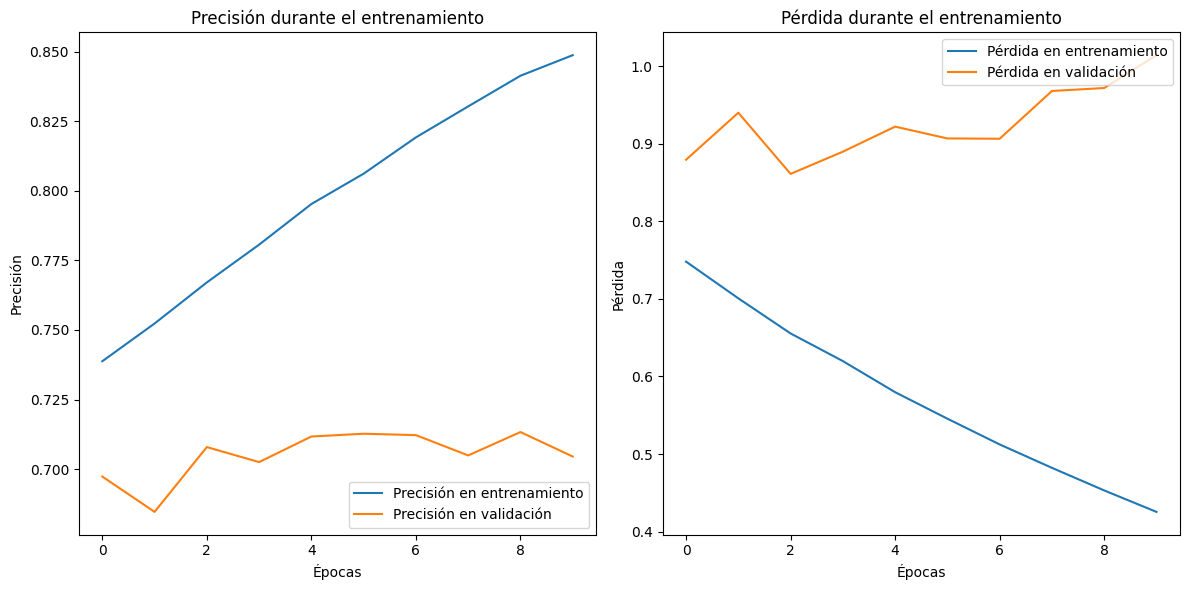

In [6]:
# Función para entrenar el modelo
def entrenar_modelo(modelo, train_images, train_labels, test_images, test_labels, epochs=10):
    # Entrenamos el modelo y guardamos el historial de entrenamiento
    historial = modelo.fit(
        train_images,
        train_labels,
        epochs=epochs,
        validation_data=(test_images, test_labels)  # Datos de validación para monitorear el rendimiento en datos no vistos
    )

    # Evaluamos el modelo con los datos de prueba
    resultados = modelo.evaluate(test_images, test_labels)
    print(f"Precisión en datos de prueba: {resultados[1]:.4f}")

    return historial

# Entrenamos el modelo
historial = entrenar_modelo(modelo_cnn, train_images, train_labels, test_images, test_labels, epochs=10)

# Función para visualizar el historial de entrenamiento
def visualizar_historial(historial):
    # Graficamos la precisión en entrenamiento y validación
    plt.figure(figsize=(12, 6))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(historial.history['accuracy'], label='Precisión en entrenamiento')
    plt.plot(historial.history['val_accuracy'], label='Precisión en validación')
    plt.title('Precisión durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend(loc='lower right')

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(historial.history['loss'], label='Pérdida en entrenamiento')
    plt.plot(historial.history['val_loss'], label='Pérdida en validación')
    plt.title('Pérdida durante el entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Llamar a la función para visualizar el historial de entrenamiento
visualizar_historial(historial)


# Paso 4

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


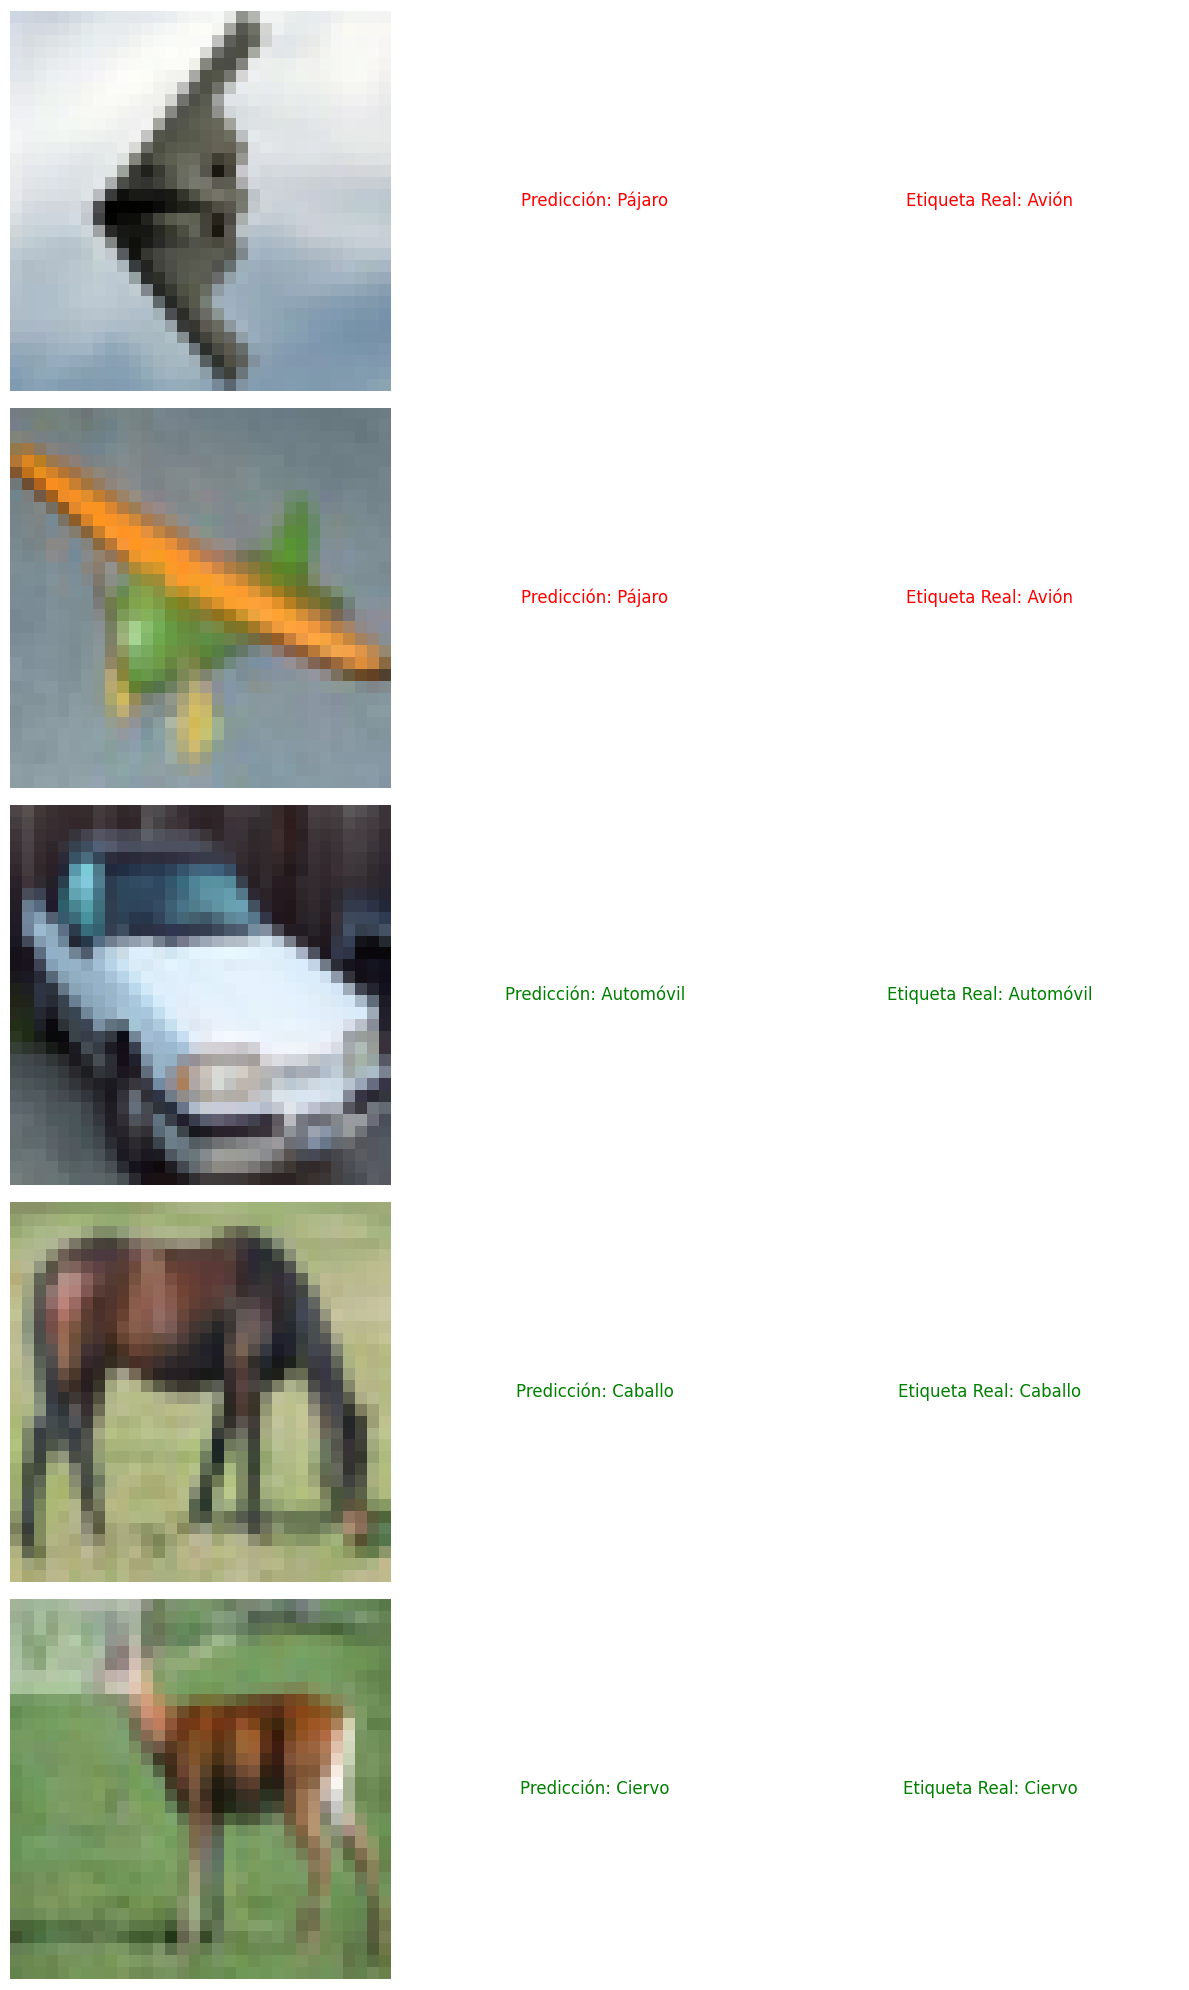

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


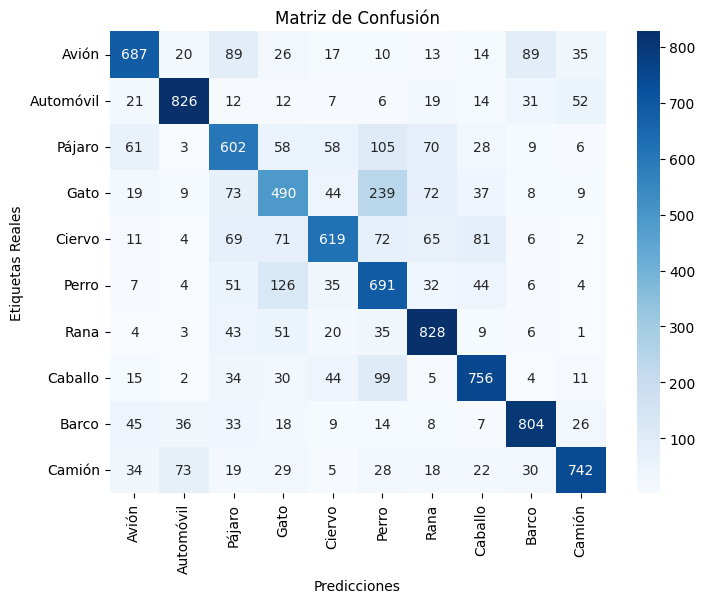

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

# Función para predecir y visualizar las imágenes con sus etiquetas reales y predicciones
def predecir_y_visualizar(modelo, images, labels, class_names, num_imagenes=5):
    # Seleccionamos algunas imágenes aleatorias
    indices = np.random.choice(len(images), num_imagenes, replace=False)

    # Predecimos las clases
    predicciones = modelo.predict(images[indices])
    clases_predichas = np.argmax(predicciones, axis=1)
    clases_reales = np.argmax(labels[indices], axis=1)

    # Visualizamos las imágenes, las predicciones y las etiquetas reales
    plt.figure(figsize=(12, 4 * num_imagenes))
    for i, idx in enumerate(indices):
        plt.subplot(num_imagenes, 3, i * 3 + 1)
        plt.imshow(images[idx])
        plt.axis('off')

        plt.subplot(num_imagenes, 3, i * 3 + 2)
        plt.text(0.5, 0.5, f"Predicción: {class_names[clases_predichas[i]]}", ha='center', va='center', fontsize=12, color='green' if clases_predichas[i] == clases_reales[i] else 'red')
        plt.axis('off')

        plt.subplot(num_imagenes, 3, i * 3 + 3)
        plt.text(0.5, 0.5, f"Etiqueta Real: {class_names[clases_reales[i]]}", ha='center', va='center', fontsize=12, color='green' if clases_predichas[i] == clases_reales[i] else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Función para mostrar la matriz de confusión
def mostrar_matriz_confusion(modelo, images, labels, class_names):
    # Predecimos todas las imágenes del conjunto de prueba
    predicciones = modelo.predict(images)
    clases_predichas = np.argmax(predicciones, axis=1)
    clases_reales = np.argmax(labels, axis=1)

    # Calculamos la matriz de confusión
    matriz_confusion = confusion_matrix(clases_reales, clases_predichas)

    # Visualizamos la matriz de confusión con un heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Matriz de Confusión')
    plt.xlabel('Predicciones')
    plt.ylabel('Etiquetas Reales')
    plt.show()

# Llamada a la función para predecir y visualizar las predicciones
predecir_y_visualizar(modelo_cnn, test_images, test_labels, class_names, num_imagenes=5)

# Llamada a la función para mostrar la matriz de confusión
mostrar_matriz_confusion(modelo_cnn, test_images, test_labels, class_names)


# Paso 5

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,148,362 (4.38 MB)

 Trainable params: 1,147,914 (4.38 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 147s 184ms/step - accuracy: 0.2579 - loss: 2.6471 - val_accuracy: 0.4520 - val_loss: 1.5557
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - accuracy: 0.4011 - loss: 1.6883 - val_accuracy: 0.5245 - val_loss: 1.3399
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.4496 - loss: 1.5138 - val_accuracy: 0.5164 - val_loss: 1.3567
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 195ms/step - accuracy: 0.4896 - loss: 1.4136 - val_accuracy: 0.5512 - val_loss: 1.2566
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 183ms/step - accuracy: 0.5140 - loss: 1.3565 - val_accuracy: 0.5287 - val_loss: 1.3918
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - accuracy: 0.5325 - loss: 1.3160 - val_accuracy: 0.5961 - val_loss: 1.1832
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 189ms/step - accuracy: 0.5488 - loss: 1.2618 - val_accuracy: 0.6320 - val_loss: 1.0462
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.5595 -

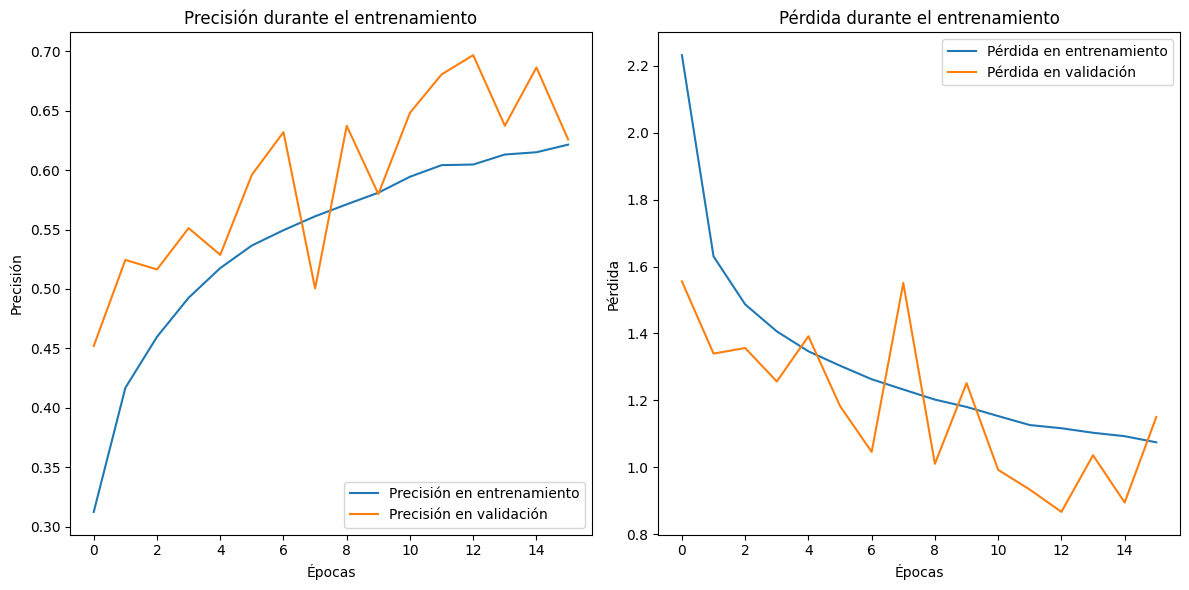

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Función para crear un modelo CNN mejorado con más capas, regularización y optimización avanzada
def crear_modelo_mejorado():
    modelo = models.Sequential()

    # Primera capa convolucional con 32 filtros y BatchNormalization
    modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.MaxPooling2D((2, 2)))  # Primer MaxPooling
    modelo.add(layers.Dropout(0.25))

    # Segunda capa convolucional con 64 filtros y BatchNormalization
    modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.MaxPooling2D((2, 2)))  # Segundo MaxPooling
    modelo.add(layers.Dropout(0.3))

    # Tercera capa convolucional con 128 filtros y BatchNormalization
    modelo.add(layers.Conv2D(128, (3, 3), activation='relu'))
    modelo.add(layers.BatchNormalization())
    # Eliminamos una capa de MaxPooling para evitar reducir demasiado el tamaño
    modelo.add(layers.Dropout(0.4))

    # Aplanar la salida para las capas densas
    modelo.add(layers.Flatten())

    # Capa densa con 512 neuronas y Dropout
    modelo.add(layers.Dense(512, activation='relu'))
    modelo.add(layers.Dropout(0.5))

    # Capa de salida con 10 neuronas y activación softmax
    modelo.add(layers.Dense(10, activation='softmax'))

    # Optimizador Adam con tasa de aprendizaje dinámica
    optimizador = tf.keras.optimizers.Adam(learning_rate=0.0005)
    modelo.compile(optimizer=optimizador,
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

    return modelo

# Función para aplicar data augmentation
def aplicar_data_augmentation():
    datagen = ImageDataGenerator(
        rotation_range=20,          # Rango de rotación
        width_shift_range=0.15,     # Desplazamiento horizontal
        height_shift_range=0.15,    # Desplazamiento vertical
        zoom_range=0.15,            # Zoom aleatorio
        horizontal_flip=True,       # Volteo horizontal
        shear_range=0.2,            # Cortes aleatorios
        fill_mode='nearest'         # Relleno de píxeles
    )
    datagen.fit(train_images)  # Ajustamos el generador al conjunto de entrenamiento
    return datagen

# Crear el modelo mejorado
modelo_mejorado = crear_modelo_mejorado()
modelo_mejorado.summary()

# Aplicar data augmentation
datagen = aplicar_data_augmentation()

# Entrenamiento con EarlyStopping y data augmentation
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamos el modelo
hist_mejorado = modelo_mejorado.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=20,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]  # Usamos EarlyStopping para evitar sobreajuste
)

# Visualizar el historial de entrenamiento
visualizar_historial(hist_mejorado)
